<h1 align='center' style='color:black'> Tic Tac Toe </h1>

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,precision_score,recall_score,accuracy_score,f1_score
%matplotlib inline

## Loading Data

In [2]:
data=pd.read_csv('tic-tac-toe.csv')
# Printing the Head
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


- x : First Player
- o : Second Player
- b : Blank

<table style="width:100% , height=50%" >
  <tr>
<th>Feature</th>
    <th>Describtion</th>
  </tr>
  <tr>
    <td>V1</td>
    <td>top-left-square(x,o,b)</td>
  </tr>
     <tr>
    <td>V2</td>
    <td>top-middle-square(x,o,b)</td>
  </tr>
     <tr>
    <td>V3</td>
    <td>top-right-square(x,o,b)</td>
  </tr>
    <tr>
    <td>V4</td>
    <td>middle-left-square(x,o,b)</td>
  </tr> 
     <tr>
    <td>V5</td>
    <td>middle-middle-square(x,o,b)</td>
  </tr> 
     <tr>
    <td>V6</td>
    <td>middle-right-square(x,o,b)</td>
  </tr> 
     <tr>
    <td>V7</td>
    <td>bottom-left-square(x,o,b)</td>
  </tr> 
     <tr>
    <td>V8</td>
    <td>bottom-left-square(x,o,b)</td>
  </tr> 
     <tr>
    <td>V9</td>
    <td>bottom-left-square(x,o,b)</td>
  </tr> 
     <tr>
    <td>V10</td>
    <td>Class:{positive,negative}</td>
  </tr> 
      </table> 
                                      <h6 align='center' > Table(1) Features Describtion</h6> 


## EDA (Exploratory Data Analysis)

In [3]:
# Printing the columns names
print(data.columns)
data.describe()

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10'], dtype='object')


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
count,958,958,958,958,958,958,958,958,958,958
unique,3,3,3,3,3,3,3,3,3,2
top,x,x,x,x,x,x,x,x,x,positive
freq,418,378,418,378,458,378,418,378,418,626


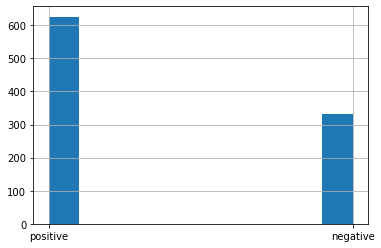

In [4]:
data.V10.hist()

In [5]:
data.V10.value_counts()

positive    626
negative    332
Name: V10, dtype: int64

In [6]:
# Printing the Data Type for each Column and the capacity of the data on the memory
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   V1      958 non-null    object
 1   V2      958 non-null    object
 2   V3      958 non-null    object
 3   V4      958 non-null    object
 4   V5      958 non-null    object
 5   V6      958 non-null    object
 6   V7      958 non-null    object
 7   V8      958 non-null    object
 8   V9      958 non-null    object
 9   V10     958 non-null    object
dtypes: object(10)
memory usage: 75.0+ KB


In [7]:
# Looking for Missing Values
data.isnull().sum()

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
dtype: int64

In [8]:
# Find the Duplicate Rows
data.duplicated().sum()

0

## Data Preprocessing

In [9]:
# Using Label Encoder convert catergorial data into Numerical data
le = LabelEncoder()

data['V1'] = le.fit_transform(data['V1'])

data['V2'] = le.fit_transform(data['V2'])

data['V3'] = le.fit_transform(data['V3'])

data['V4'] = le.fit_transform(data['V4'])

data['V5'] = le.fit_transform(data['V5'])

data['V6'] = le.fit_transform(data['V6'])

data['V7'] = le.fit_transform(data['V7'])

data['V8'] = le.fit_transform(data['V8'])

data['V9'] = le.fit_transform(data['V9'])

data['V10'] = le.fit_transform(data['V10'])

In [10]:
# Printing the data after preprocessing
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,2,2,2,2,1,1,2,1,1,1
1,2,2,2,2,1,1,1,2,1,1
2,2,2,2,2,1,1,1,1,2,1
3,2,2,2,2,1,1,1,0,0,1
4,2,2,2,2,1,1,0,1,0,1


## Defining X and y

In [11]:
# Define Input Variables (X) & Output Variable (y) 
X= data.iloc[:,:-1]
y=data['V10']

## Splitting the Data into Training & Testing
* we split the data into (80%) for training and (20%) for testing

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [13]:
# Printing the shape of X_train,X_test, y_train, y_test
print('X_train',X_train.shape)
print('y_train',y_train.shape)
print('X_test',X_test.shape)
print('y_test',y_test.shape)

X_train (766, 9)
y_train (766,)
X_test (192, 9)
y_test (192,)


## Building the model

In [14]:
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(C=10,random_state=10, probability=True),
    "Random Forest": RandomForestClassifier(random_state=10),
    "XGBoost": XGBClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=10),
    "Neural Network": MLPClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " : Training Completed Successfully")

K-Nearest Neighbors : Training Completed Successfully
Logistic Regression : Training Completed Successfully
Support Vector Machine : Training Completed Successfully
Random Forest : Training Completed Successfully
XGBoost : Training Completed Successfully
Decision Tree : Training Completed Successfully
Neural Network : Training Completed Successfully


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## Evaluating the Model

In [15]:
for name, model in models.items():
    print(name + " Accuracy: {:.2f}%".format(model.score(X_test, y_test) * 100))

K-Nearest Neighbors Accuracy: 83.85%
Logistic Regression Accuracy: 69.79%
Support Vector Machine Accuracy: 100.00%
Random Forest Accuracy: 94.79%
XGBoost Accuracy: 100.00%
Decision Tree Accuracy: 93.23%
Neural Network Accuracy: 83.85%


## The Best Model

In [16]:
best_model = models["Support Vector Machine"]

## Making Prediction on Testing Data

In [17]:
y_pred=best_model.predict(X_test)

## Actual Values

In [18]:
print(y_test[:5])

27     1
649    0
778    0
820    0
194    1
Name: V10, dtype: int32


## Predicted Values

In [19]:
print(y_pred[:5])

[1 0 0 0 1]


## Evaluating the Best Model

In [20]:
# Printing the confusion matrix
print("confusion_matrix \n\n",confusion_matrix(y_test, y_pred))
# Printing the accuracy_score
print("_______________________________________________________\n")
a1=accuracy_score(y_test, y_pred).round(4)*100
print("accuracy_score = ", a1)
# Printing f1_score
print("_______________________________________________________\n")
print("f1_score = ", f1_score(y_test, y_pred).round(4)*100)
print("_______________________________________________________\n")
# Printing precision_score
print("precision_score = ", precision_score(y_test, y_pred).round(4)*100)
print("_______________________________________________________\n")
# Printing recall_score
r1=recall_score(y_test, y_pred).round(4)*100
print("recall_score = ", r1)
print("_______________________________________________________\n")
ypro1 = best_model.predict_proba(X_test)[:,1]# probability 
print("roc_auc_score = ",roc_auc_score(y_test,ypro1).round(4)*100)

confusion_matrix 

 [[ 66   0]
 [  0 126]]
_______________________________________________________

accuracy_score =  100.0
_______________________________________________________

f1_score =  100.0
_______________________________________________________

precision_score =  100.0
_______________________________________________________

recall_score =  100.0
_______________________________________________________

roc_auc_score =  100.0


In [21]:
print("Classification_report : \n ",classification_report(y_test, y_pred))

Classification_report : 
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        66
           1       1.00      1.00      1.00       126

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192



## ROC Curve for the Best Model

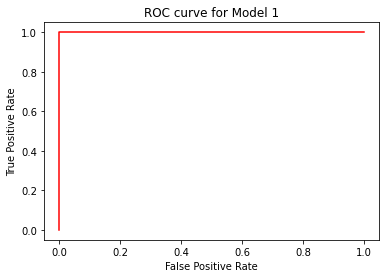

In [22]:
y_predict = best_model.predict_proba(X_test)[:,1]#probability 
fpr, tpr, thresholds = roc_curve(y_test,y_predict)
plt.title('ROC curve for Model 1')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr, tpr,color='red')

## Making Prediction on Unseen Data

### 1. Predicting the Win 

In [23]:
# First player will be x, x = 2, o= 1, b=0
newdata = [2,0,0,2,0,1,2,0,1]

In [24]:
best_model.predict([newdata])

array([1])

- The results show that x  has won

### 2. Predicting the Loss 

In [25]:
# First player will be o, x = 2, o= 1, b=0
newdata2 = [1,0,0,1,0,2,2,0,2]

In [26]:
best_model.predict([newdata2])

array([0])

- The results show that o  has lost

# Exporting The Best Model

In [27]:
import joblib
joblib.dump(best_model, 'tic_tac_toe.pkl') 

['tic_tac_toe.pkl']